In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Data preparation

In [5]:
# load mnist database
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

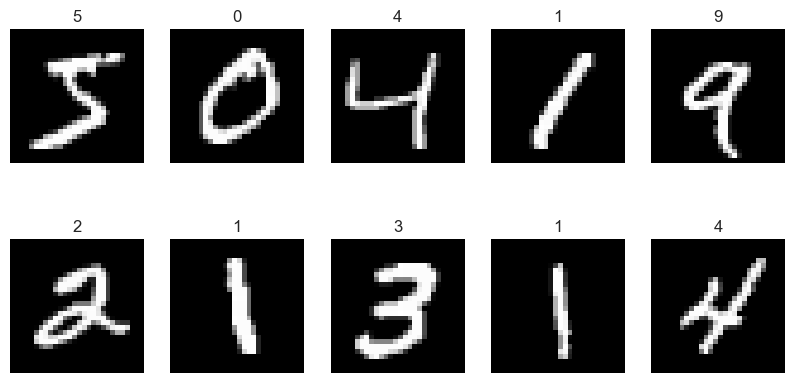

In [6]:
X = np.array(X_train)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(y_train[i])
    ax.axis('off')
plt.show()

# Model Building

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

params = {
    'C': [0.1, 1, 10, 100]
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid_search.fit(X_train.reshape(-1, 784), y_train)

In [21]:
grid_search.best_params_

{'C': 0.1}

In [11]:
ova_classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000, C=grid_search.best_params_['C']))

In [ ]:
ova_classifier.fit(X_train.reshape(-1, 784), y_train)

In [14]:
accuracy = ova_classifier.score(X_test.reshape(-1, 784), y_test)

In [15]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.918


# Accuracy 0.918

In [16]:
y_pred = ova_classifier.predict(X_test.reshape(-1, 784))

# Metrics

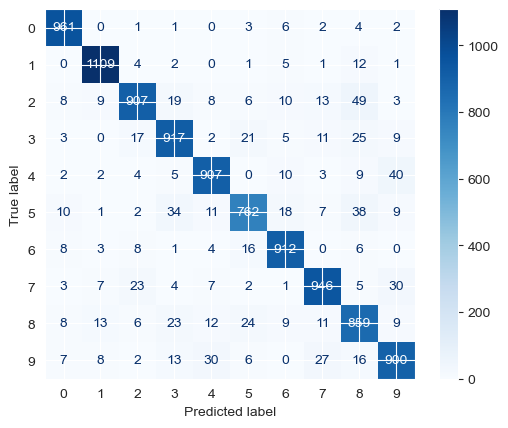

In [22]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=np.arange(10))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=np.arange(10))
cm_display.plot(cmap='Blues', values_format='d')
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.92      0.92       982
           5       0.91      0.85      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.84      0.88      0.86       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


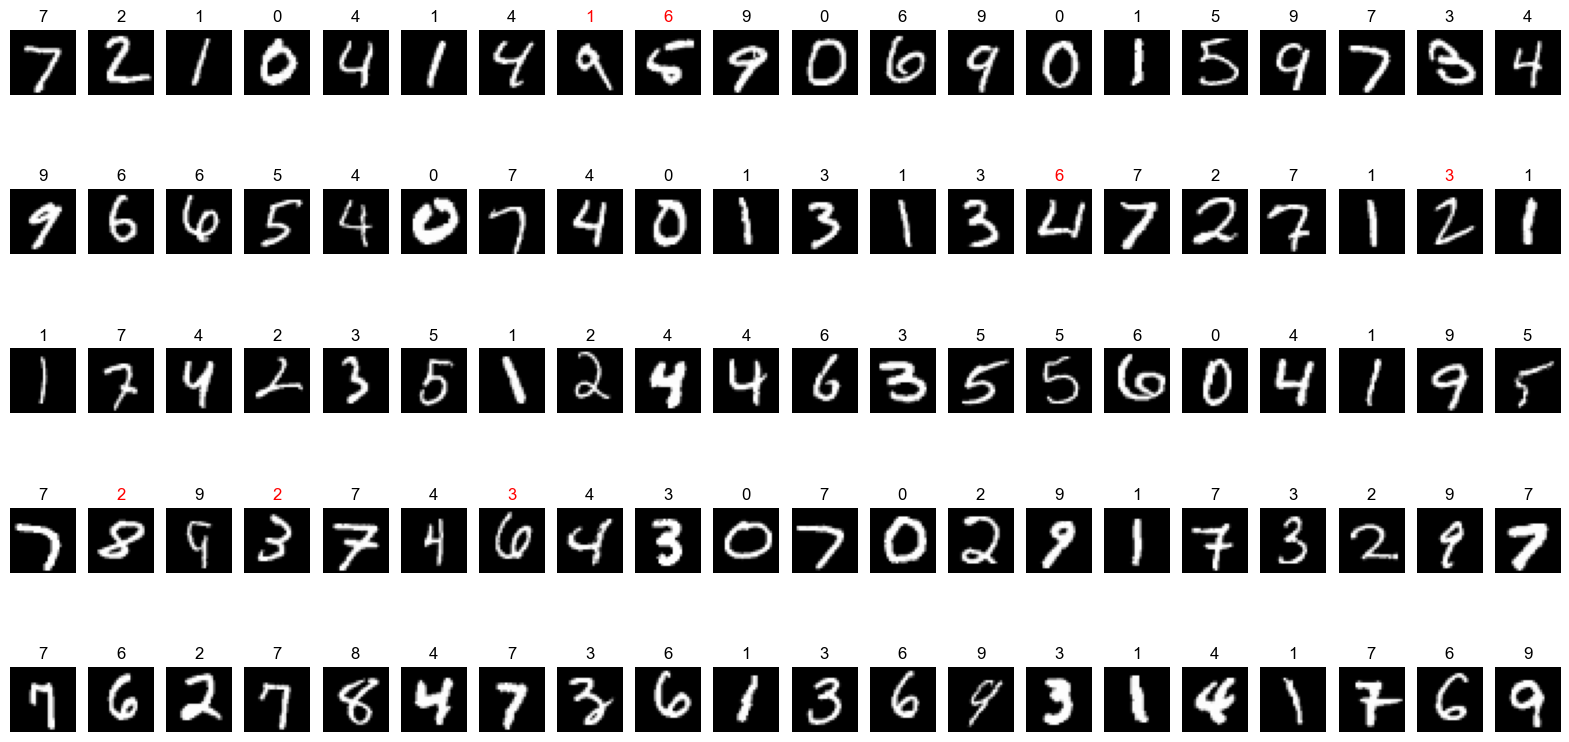

In [25]:
fig, axes = plt.subplots(5, 20, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(y_pred[i], color='black' if y_pred[i] == y_test[i] else 'red')
    ax.axis('off')
plt.show()

In [27]:
save_model(ova_classifier, 'ova_classifier.pkl')